In [44]:
import os
import importlib

from DMSP import funcs

importlib.reload(funcs)

<module 'funcs' from 'G:\\master\\pyWave\\funcs.py'>

In [45]:
# ssies3
dir = r"data\2014\f16\ssm"
fn = "dmsp-f16_ssm_magnetometer_20140101_v1.0.4.cdf"
fp = os.path.join(dir,fn)
ssm_data = funcs.process_ssm_data(fp)

# ssm
dir = r"data\2014\f16\ssies3"
fn = "dmsp-f16_ssies-3_thermal-plasma_201401011654_v01.cdf"
fp = os.path.join(dir,fn)
ssies3_data = funcs.process_ssies3_data(fp)
# ssm_clip
ssm_data_clip = funcs.clip_ssm_by_ssies3(ssies3_data, ssm_data)

In [46]:
data = funcs.ssm_sc_to_ssies_sc(ssm_data_clip['B_SC_OBS_ORIG_x'], ssm_data_clip['B_SC_OBS_ORIG_y'], ssm_data_clip['B_SC_OBS_ORIG_z'])
B = funcs.ssies_sc_to_ENU(data['1'], data['2'], data['3'], ssm_data_clip['SC_ALONG_GEO_x'], ssm_data_clip['SC_ALONG_GEO_y'], ssm_data_clip['SC_ACROSS_GEO_x'], ssm_data_clip['SC_ACROSS_GEO_y'])

# draw

## low-pass filter

In [47]:
# # Function to apply a low-pass filter
# def apply_lowpass_filter(series, cutoff_frequency, fs, order=5):
#     nyquist = 0.5 * fs  # Nyquist frequency
#     normal_cutoff = cutoff_frequency / nyquist
#     # Design Butterworth filter
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     # Apply the filter
#     filtered_series = filtfilt(b, a, series)
#     return pd.Series(filtered_series, index=series.index)
# 
# # Function to apply the low-pass filter in segments
# def segment_and_filter(series, segment_size, cutoff_frequency, fs, order=5):
#     segments = np.array_split(series, np.ceil(len(series) / segment_size))
#     filtered_segments = [apply_lowpass_filter(segment, cutoff_frequency, fs, order) for segment in segments]
#     # Concatenate the filtered segments back into a single series
#     filtered_series = pd.concat(filtered_segments)
#     return filtered_series
# 
# # Parameters for low-pass filter
# cutoff_frequency = 0.1  # Adjust the cutoff frequency as needed
# sampling_frequency = 1  # 1 Hz, since data has a 1-second interval
# segment_size = 20  # Number of samples in each segment (e.g., 300 seconds)
# 
# # Apply segmented low-pass filter
# filtered_data_segmented = segment_and_filter(B['E'], segment_size, cutoff_frequency, sampling_frequency)

(<Axes: xlabel='Epoch'>, <Axes: xlabel='Epoch'>)

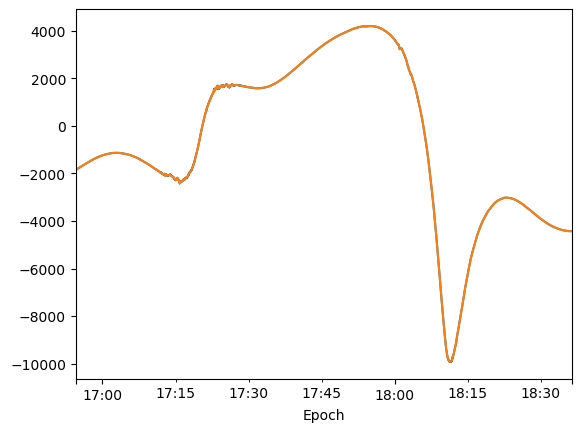

In [48]:
# B['E'].plot() ,filtered_data_segmented.plot()

<Axes: xlabel='Epoch'>

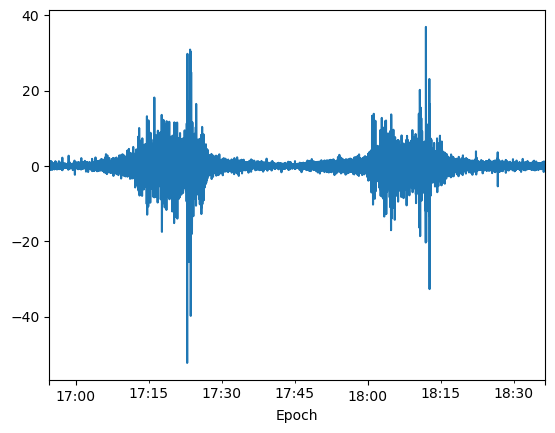

In [49]:
# (B['E'] - filtered_data_segmented).plot()

## moving ave

In [51]:
# Function to calculate and return the moving average
def get_moving_average(series, window_size):
    # Apply moving average
    moving_avg = series.rolling(window=window_size, min_periods=1).mean()
    return moving_avg

# Example usage with a specified window size (e.g., 60 seconds)
window_size = 60
moving_average_result = get_moving_average(B['E'], window_size)

(<Axes: xlabel='Epoch'>, <Axes: xlabel='Epoch'>)

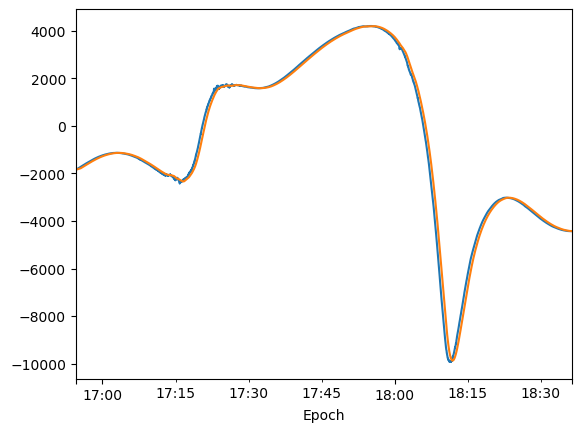

In [52]:
# B['E'].plot() ,moving_average_result.plot()

<Axes: xlabel='Epoch'>

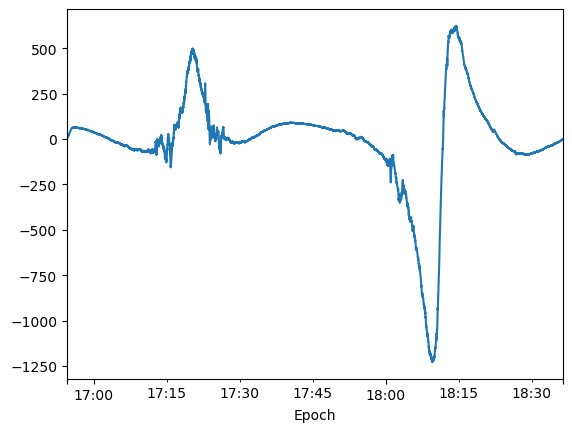

In [53]:
(B['E'] - moving_average_result).plot()

## IGRF and moving ave

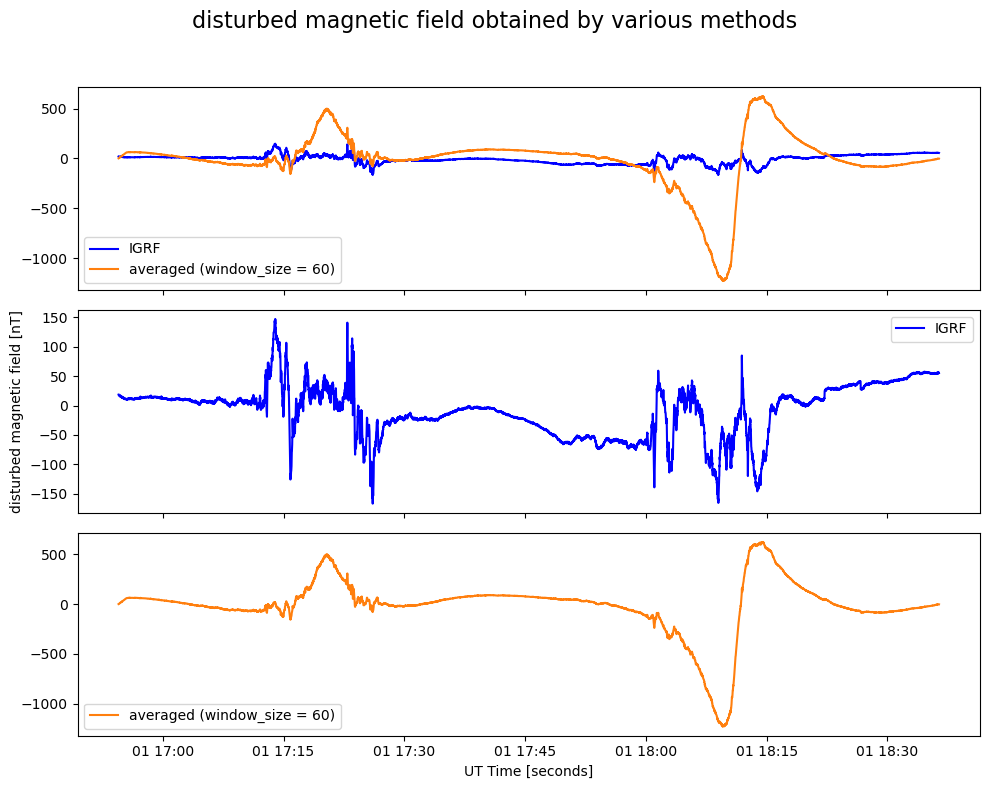

In [54]:
# t = ssies3_data.index
# B_E = B['E']
# 
# fig, axes = plt.subplots(3, sharex=True, figsize=(10, 8))
# 
# # 第一子图
# axes[0].plot(t, B_E-ssies3_data['by'], color='b', label='IGRF')
# axes[0].plot(t, B_E-moving_average_result, color='tab:orange', label=f'averaged (window_size = {window_size})')
# axes[0].legend()
# 
# # 第二子图
# axes[1].plot(t, B_E-ssies3_data['by'], color='b', label='IGRF')
# axes[1].set_ylabel('disturbed magnetic field [nT]')
# axes[1].legend()
# 
# # 第三子图
# axes[2].plot(t, B_E-moving_average_result, color='tab:orange', label=f'averaged (window_size = {window_size})')
# axes[2].set_xlabel('UT Time [seconds]')
# axes[2].legend()
# 
# # 添加全局标题
# fig.suptitle('disturbed magnetic field obtained by various methods', fontsize=16)
# 
# # 调整子图间距
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # 防止子图和全局标题重叠
# 
# # 显示图形
# plt.show()

In [55]:

import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Define function to plot the data with adjustable window size
def plot_moving_average(window_size):
    # Extract relevant data
    t = ssies3_data.index
    B_E = B['E']
    
    # Calculate moving average
    moving_average_result = B_E.rolling(window=window_size, min_periods=1).mean()
    
    # Create subplots
    fig, axes = plt.subplots(3, sharex=True, figsize=(10, 8))
    
    # First subplot
    axes[0].plot(t, B_E - ssies3_data['by'], color='b', label='IGRF')
    axes[0].plot(t, B_E - moving_average_result, color='tab:orange', label=f'averaged (window_size = {window_size})')
    axes[0].legend()
    
    # Second subplot
    axes[1].plot(t, B_E - ssies3_data['by'], color='b', label='IGRF')
    axes[1].set_ylabel('disturbed magnetic field [nT]')
    axes[1].legend()
    
    # Third subplot
    axes[2].plot(t, B_E - moving_average_result, color='tab:orange', label=f'averaged (window_size = {window_size})')
    axes[2].set_xlabel('UT Time [seconds]')
    axes[2].legend()
    
    # Add a global title
    fig.suptitle('disturbed magnetic field obtained by various methods', fontsize=16)
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Show the plot
    plt.show()

# Create an interactive slider to change window size
interact(plot_moving_average, window_size=IntSlider(min=1, max=120, step=1, value=60, description='Window Size (s)'))


interactive(children=(IntSlider(value=60, description='Window Size (s)', max=120, min=1), Output()), _dom_clas…

<function __main__.plot_moving_average(window_size)>

# 结论

- 一段一段进行低通滤波和整段进行低通滤波结果一样
- 滑动平均得到的磁扰与IGRF得到的磁扰有相似的地方，也有完全不同的地方！（如上图）；窗口越大，扰动磁场幅值越大。
- 依旧使用IGRF？